# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import os
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Reading & Preprocessing the Data

In [2]:
data = []
labels = []
classes = 43
cur_path = os.getcwd()

for i in range(classes):
    path = os.path.join(cur_path, 'dataset', 'train', str(i))
    images = os.listdir(path)

    for a in images:
        try:
            image = Image.open(path + '\\' + a)
            image = image.resize((30, 30))
            image = np.array(image)
            data.append(image)
            labels.append(i)
        except:
            print("Error loading image")

data = np.array(data)
labels = np.array(labels)

# Splitting the Data between Train & Test

In [3]:
print(data.shape, labels.shape)
#Splitting training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
#Converting the labels into one hot encoding
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

(39209, 30, 30, 3) (39209,)
(31367, 30, 30, 3) (7842, 30, 30, 3) (31367,) (7842,)


# Building the Model

In [4]:
#Building the model
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(43, activation='softmax'))

#Compilation of the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Training & Saving the Model

In [5]:
epochs = 15
history = model.fit(X_train, y_train, batch_size=32, epochs=epochs, validation_data=(X_test, y_test))
model.save("my_model.h5")

Epoch 1/15
981/981 [==============================] - 173s 171ms/step - loss: 2.0660 - accuracy: 0.4875 - val_loss: 0.4824 - val_accuracy: 0.8942
Epoch 2/15
981/981 [==============================] - 153s 156ms/step - loss: 0.5915 - accuracy: 0.8271 - val_loss: 0.1663 - val_accuracy: 0.9558
Epoch 3/15
981/981 [==============================] - 159s 162ms/step - loss: 0.3894 - accuracy: 0.8884 - val_loss: 0.1066 - val_accuracy: 0.9697
Epoch 4/15
981/981 [==============================] - 180s 184ms/step - loss: 0.2947 - accuracy: 0.9175 - val_loss: 0.0907 - val_accuracy: 0.9790
Epoch 5/15
981/981 [==============================] - 181s 184ms/step - loss: 0.2690 - accuracy: 0.9235 - val_loss: 0.0836 - val_accuracy: 0.9745
Epoch 6/15
981/981 [==============================] - 171s 174ms/step - loss: 0.2446 - accuracy: 0.9316 - val_loss: 0.0837 - val_accuracy: 0.9777
Epoch 7/15
981/981 [==============================] - 171s 174ms/step - loss: 0.2374 - accuracy: 0.9357 - val_loss: 0.0902 -

# Plotting Accuracy & Loss

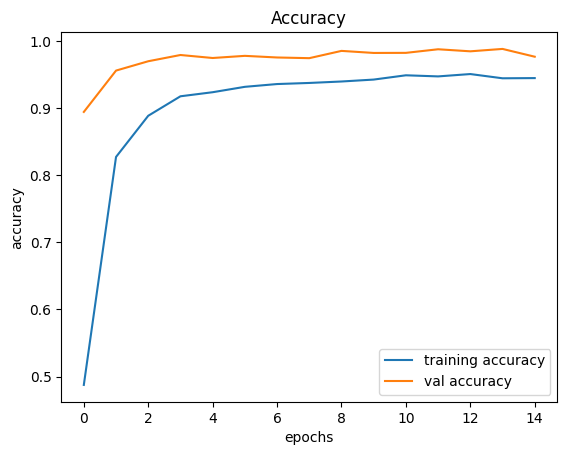

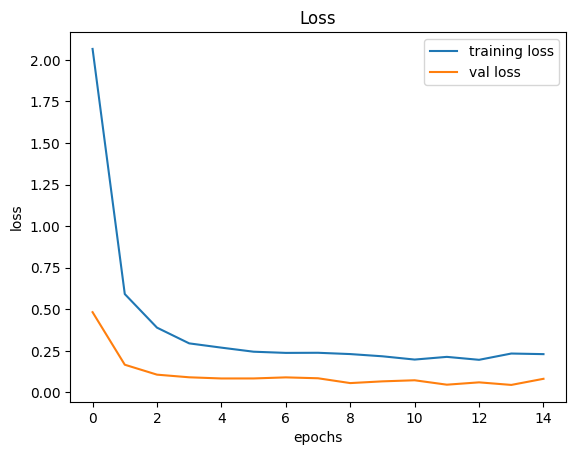

In [6]:
#plotting graph for accuracy
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

#plotting graph for loss
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Testing the Model

In [22]:
#testing accuracy on test dataset
from sklearn.metrics import accuracy_score
y_test = pd.read_csv('Test.csv')
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data =[]
for img in imgs:
    image = Image.open(img)
    image = image.resize((30,30))
    data.append(np.array(image))
X_test = np.array(data)
pred = model.predict(X_test)
pred = np.argmax(pred, axis=1)
#Accuracy with the test data
print(accuracy_score(labels, pred))
model.save("traffic_classifier.h5")

395/395 [==============================] - 17s 44ms/step
0.9496437054631829


In [23]:
import visualkeras

visualkeras.layered_view(model).show() # display using your system viewer